### Exploratory Data Analysis

### Load the data from drive

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy


from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/BioNLP2023-1A-Train.csv") 
df.head(5)

Mounted at /content/drive


,File ID,Assessment,Summary,Subjective Sections,Objective Sections
0,188026.txt,"H/O HYPERKALEMIA (HIGH POTASSIUM, HYPERPOTASSE...",# Hypoxia:; Hyperkalemia,ULTRASOUND - At [**2121-3-16**] 11:32 AM\n- MD...,Last dose of Antibiotics:\nAzithromycin - [**2...
1,101616.txt,67 y/o M CAD s/[**Initials (NamePattern4) **] ...,Lower GI bleed; Hypotension; CAD,COLONOSCOPY - At [**2171-1-25**] 12:31 PM\n- C...,Last dose of Antibiotics:\nInfusions:\nOther I...
2,102486.txt,81F with h/o chronic eosinophilic lung disease...,PULMONARY EMBOLISM; FEVER; HYPOTENSION; OLIGUR...,Pleuritic right chest pain\n- patient started ...,Last dose of Antibiotics:\nCiprofloxacin - [**...
3,198989.txt,"79 yo F w/ a h/o CHF (EF of 20-30%), carotid s...",Sepsis; Altered/Depressed MS\n thought to be [...,- ID: rec bedside echo\n- continued fluid bolu...,Last dose of Antibiotics:\nMetronidazole - [**...
4,193604.txt,Mr. [**Known firstname 1908**] [**Known lastna...,# Bradycardia / Rhythm; #. Hypertension; # CAD...,High-grade AV nodal block\n- Had successful [*...,Last dose of Antibiotics:\nInfusions:\nOther I...


### Combining Assesment column with Subjective Column

In [2]:
df['Assessment'] = df['Assessment'] + ' ' +df['Subjective Sections']

### Basic Statistics

In [3]:
print('Number of rows in input:', len(df['Assessment']))
print('Number of rows in summary:', len(df['Summary']))
print('Average length of input text :', df['Assessment'].apply(len).mean())
print('Average length of Summary:', df['Summary'].apply(len).mean())

Number of rows in input: 756
Number of rows in summary: 756
Average length of input text : 765.7195767195767
Average length of Summary: 81.31349206349206


### Count and length of input text data

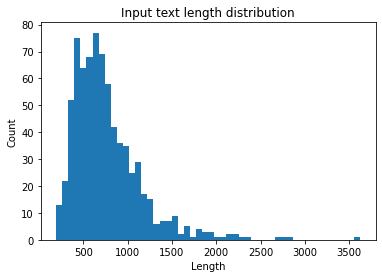

In [4]:
# Visualize the data
plt.hist(df['Assessment'].apply(len), bins=50)
plt.title('Input text length distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

Count and length of Summary Data

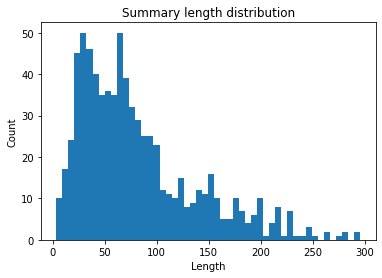

In [5]:
plt.hist(df['Summary'].apply(len), bins=50)
plt.title('Summary length distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

### Input Text Length vs Summary Length

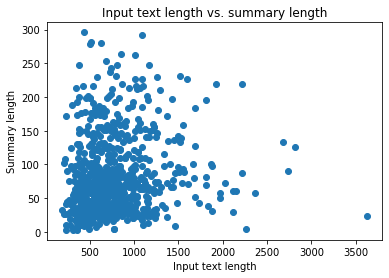

In [6]:
plt.scatter(df['Assessment'].apply(len), df['Summary'].apply(len))
plt.title('Input text length vs. summary length')
plt.xlabel('Input text length')
plt.ylabel('Summary length')
plt.show()

### Word Cloud Representation of Input

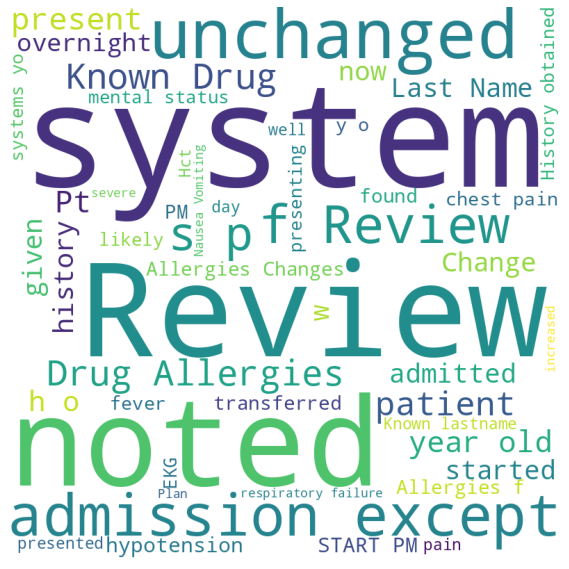

In [7]:
wordcloud_input_text = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(df['Assessment']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_input_text)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()


### Word Cloud Representation of Summary

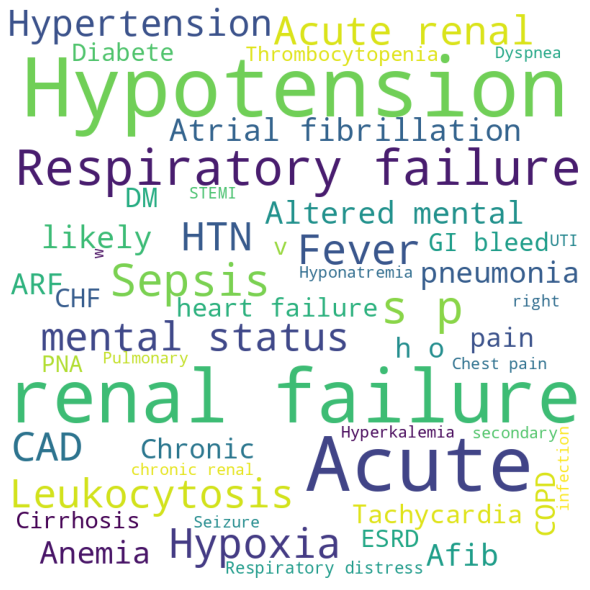

In [8]:
summary_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(df['Summary']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(summary_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Vocabulary Count Input Text

> Indented block



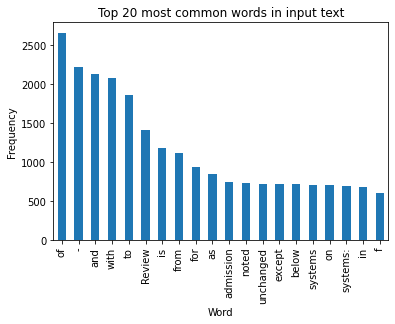

In [9]:
input_text_words = ' '.join(df['Assessment']).split()
summary_words = ' '.join(df['Summary']).split()

input_text_word_freq = pd.Series(input_text_words).value_counts()
input_text_word_freq[:20].plot(kind='bar')
plt.title('Top 20 most common words in input text')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

### Vocabulary Count Summary

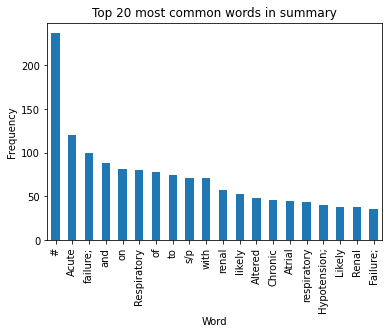

In [10]:
summary_word_freq = pd.Series(summary_words).value_counts()
summary_word_freq[:20].plot(kind='bar')
plt.title('Top 20 most common words in summary')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

###Target summary length

In [11]:
print('Median summary length:', df['Summary'].apply(len).median())
print('Interquartile range of summary length:', df['Summary'].apply(len).quantile([0.25, 0.75]))

Median summary length: 67.0
Interquartile range of summary length: 0.25     38.00
0.75    105.25
Name: Summary, dtype: float64


The number of duplicates, missing values in input text and summary

In [12]:
print('Number of duplicates:', df.duplicated().sum())
print('Number of missing values in input text:', df['Assessment'].isnull().sum())
print('Number of missing values in summary:', df['Summary'].isnull().sum())

Number of duplicates: 0
Number of missing values in input text: 0
Number of missing values in summary: 0
